In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [4]:
data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
data['size_category']=np.where(data['size_category'].str.contains('small'),0,1)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
data['size_category'].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [9]:
df=data.iloc[:,2:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [12]:
norm=MinMaxScaler()
df1=pd.DataFrame(norm.fit_transform(df))
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
x=df1.iloc[:,0:28]
y=df1.iloc[:,28]
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
512    1.0
513    1.0
514    1.0
515    0.0
516    0.0
Name: 28, Length: 517, dtype: float64

In [15]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [40]:
model=Sequential()
model.add(Dense(units=15,input_dim=28,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=9,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
history=model.fit(x_train,y_train, epochs=100,validation_split=.35, batch_size=10)
histor

Epoch 1/100
24/24 [==============================] - 0s 9ms/step - loss: 0.1847 - accuracy: 0.9444 - val_loss: 0.3112 - val_accuracy: 0.9134
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 0.1821 - accuracy: 0.9530 - val_loss: 0.3000 - val_accuracy: 0.9213
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1827 - accuracy: 0.9444 - val_loss: 0.3081 - val_accuracy: 0.9134
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1849 - accuracy: 0.9573 - val_loss: 0.2973 - val_accuracy: 0.9134
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 0.1802 - accuracy: 0.9615 - val_loss: 0.3021 - val_accuracy: 0.9134
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1856 - accuracy: 0.9530 - val_loss: 0.3079 - val_accuracy: 0.9055
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1731 - accuracy: 0.9573 - val_loss: 0.2956 - val_accuracy: 0.9213
Epoch 8/100
2

In [44]:
scores = model.evaluate(x_test,y_test)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8846
accuracy: 88.46%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


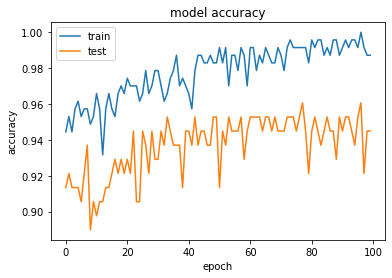

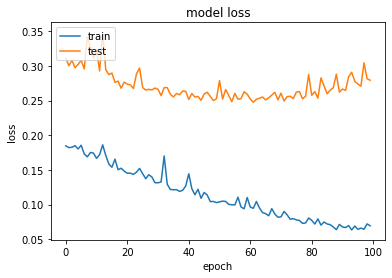

In [48]:
print(history.history.keys())
#summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier 
from tensorflow.keras.optimizers import Adam

In [50]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(15, input_dim=28, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(9, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [69]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y) 

C:\Users\NALLI NISHETHA\AppData\Local\Temp\ipykernel_16288\1237425172.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)
C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   2.6s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.750 total time=   1.8s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.524 total time=   1.8s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.680 total time=   1.8s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.699 total time=   1.7s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=1.000 total time=   4.5s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.750 total time=   4.4s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.524 total time=   4.4s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.680 total time=   4.3s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.699 total time=   4.3s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=1.000 total time=   8.0s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.750 total time=   7.3s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.524 total time=   7.6s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.680 total time=   7.5s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.699 total time=   7.6s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=1.000 total time=   1.4s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.750 total time=   1.4s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.524 total time=   1.4s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.680 total time=   1.6s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.699 total time=   1.5s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=1.000 total time=   3.4s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.750 total time=   2.7s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/9] END .....batch_size=20, epochs=50;, score=0.524 total time=   2.7s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/9] END .....batch_size=20, epochs=50;, score=0.680 total time=   2.7s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=0.699 total time=   2.7s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=1.000 total time=   4.3s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/9] END ....batch_size=20, epochs=100;, score=0.750 total time=   4.3s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/9] END ....batch_size=20, epochs=100;, score=0.524 total time=   4.4s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/9] END ....batch_size=20, epochs=100;, score=0.680 total time=   4.3s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=0.699 total time=   4.5s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=1.000 total time=   1.2s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/9] END .....batch_size=40, epochs=10;, score=0.750 total time=   1.9s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.524 total time=   1.2s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.680 total time=   1.3s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.699 total time=   1.3s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=1.000 total time=   2.0s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.750 total time=   2.0s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.524 total time=   2.0s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.680 total time=   2.0s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.699 total time=   2.0s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=1.000 total time=   2.9s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.750 total time=   3.7s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.524 total time=   2.9s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.680 total time=   2.9s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.699 total time=   2.9s


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [70]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7305825233459473, using {'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 50}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 50}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 50}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 100}


In [71]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(15,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(7,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)
 

C:\Users\NALLI NISHETHA\AppData\Local\Temp\ipykernel_16288\3500408970.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   1.3s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=   1.4s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.524 total time=   1.2s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.680 total time=   1.2s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.699 total time=   1.2s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   2.0s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.750 total time=   1.3s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.524 total time=   1.2s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.680 total time=   1.2s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.699 total time=   1.2s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   1.2s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.750 total time=   1.2s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.524 total time=   1.2s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.680 total time=   1.2s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.699 total time=   1.2s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   1.9s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.750 total time=   1.3s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.524 total time=   1.3s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.680 total time=   1.3s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.699 total time=   1.3s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   1.3s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.750 total time=   1.5s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.524 total time=   1.3s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.680 total time=   1.3s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.699 total time=   1.3s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   1.3s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.750 total time=   2.0s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.515 total time=   1.3s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.680 total time=   1.3s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.699 total time=   1.3s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   1.3s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.750 total time=   1.3s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.524 total time=   1.3s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.680 total time=   1.3s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.699 total time=   1.3s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=   1.3s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.750 total time=   1.9s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.524 total time=   1.3s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.680 total time=   1.3s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.699 total time=   1.3s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   1.5s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.750 total time=   1.3s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.524 total time=   1.3s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.680 total time=   1.3s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.699 total time=   1.3s


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [72]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7305825233459473, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7286407709121704,0.15697261519958555 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [73]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(15,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(9,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)



C:\Users\NALLI NISHETHA\AppData\Local\Temp\ipykernel_16288\1479407700.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.0s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   1.3s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   1.3s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   1.3s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   1.3s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   1.3s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.750 total time=   1.3s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.524 total time=   1.3s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.680 total time=   1.3s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.699 total time=   1.3s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=   2.0s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.750 total time=   1.3s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.524 total time=   1.5s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.680 total time=   1.3s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.699 total time=   1.3s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   1.3s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.750 total time=   1.3s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.524 total time=   1.3s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.680 total time=   1.3s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.699 total time=   1.3s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   1.9s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.750 total time=   1.3s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.524 total time=   1.3s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.680 total time=   1.3s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.699 total time=   1.3s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   1.3s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.750 total time=   1.3s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.524 total time=   1.3s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.680 total time=   1.5s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.699 total time=   1.3s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   2.0s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.750 total time=   1.3s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.524 total time=   1.3s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.680 total time=   1.3s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.699 total time=   1.3s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   1.3s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.750 total time=   1.3s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.524 total time=   1.3s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.680 total time=   1.3s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.699 total time=   1.9s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   1.3s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.750 total time=   1.3s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.524 total time=   1.3s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.680 total time=   1.3s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.699 total time=   1.3s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   1.3s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.750 total time=   1.3s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.524 total time=   1.3s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.680 total time=   1.3s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.699 total time=   1.3s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   1.9s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.750 total time=   1.3s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.524 total time=   1.3s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.680 total time=   1.4s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.699 total time=   1.3s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   1.2s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.750 total time=   1.3s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.524 total time=   1.3s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.680 total time=   1.3s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.699 total time=   1.3s


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [74]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7305825233459473, using {'activation_function': 'softmax', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'normal'}
0.5305825233459472,0.2757845556417363 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7305825233459473,0.15435061319000673 with: {'activa

In [75]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y) 


C:\Users\NALLI NISHETHA\AppData\Local\Temp\ipykernel_16288\3054285572.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   1.4s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.750 total time=   1.6s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.524 total time=   1.3s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.680 total time=   1.3s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.699 total time=   1.3s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=1.000 total time=   1.3s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.750 total time=   1.3s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.524 total time=   1.3s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.680 total time=   1.3s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.699 total time=   1.9s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=1.000 total time=   1.3s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.750 total time=   1.3s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.524 total time=   1.3s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.680 total time=   1.3s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.699 total time=   1.3s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=1.000 total time=   1.3s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.750 total time=   1.3s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.524 total time=   1.3s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.680 total time=   2.1s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.699 total time=   1.3s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=1.000 total time=   1.3s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.750 total time=   1.3s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.524 total time=   1.3s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.680 total time=   1.3s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.699 total time=   1.3s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=1.000 total time=   1.3s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.750 total time=   1.3s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.524 total time=   1.3s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.680 total time=   1.3s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.699 total time=   2.0s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=1.000 total time=   1.3s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.750 total time=   1.3s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.524 total time=   1.3s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.680 total time=   1.3s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.699 total time=   1.3s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=1.000 total time=   1.3s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.750 total time=   1.3s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.524 total time=   1.3s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.680 total time=   1.3s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.699 total time=   1.3s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=1.000 total time=   2.0s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.750 total time=   1.3s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.524 total time=   1.3s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.680 total time=   1.3s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.699 total time=   1.3s


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [76]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7305825233459473, using {'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 8}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 8}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 8}


In [80]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(4,input_dim = 28,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(2,input_dim = 16,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Fitting the model

model.fit(x,y)

# Predicting using trained model

y_predict = model.predict(x)

y_predict

C:\Users\NALLI NISHETHA\AppData\Local\Temp\ipykernel_16288\3106644883.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)
C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [81]:
print(accuracy_score(y,y_predict))

0.7311411992263056
